In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.impute import KNNImputer
from sklearn.impute import SimpleImputer
from sklearn.impute import IterativeImputer
import folium
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
import seaborn as sns

In [2]:
#Downloading the data and exploring it
data = pd.read_csv(r"C:\Users\kubus\Downloads\archive (15)\apartments_rent_pl_2024_02.csv")


data.info()


data.dtypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8318 entries, 0 to 8317
Data columns (total 28 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    8318 non-null   object 
 1   city                  8318 non-null   object 
 2   type                  6571 non-null   object 
 3   squareMeters          8318 non-null   float64
 4   rooms                 8318 non-null   float64
 5   floor                 7261 non-null   float64
 6   floorCount            8135 non-null   float64
 7   buildYear             6277 non-null   float64
 8   latitude              8318 non-null   float64
 9   longitude             8318 non-null   float64
 10  centreDistance        8318 non-null   float64
 11  poiCount              8318 non-null   float64
 12  schoolDistance        8318 non-null   float64
 13  clinicDistance        8314 non-null   float64
 14  postOfficeDistance    8315 non-null   float64
 15  kindergartenDistance 

id                       object
city                     object
type                     object
squareMeters            float64
rooms                   float64
floor                   float64
floorCount              float64
buildYear               float64
latitude                float64
longitude               float64
centreDistance          float64
poiCount                float64
schoolDistance          float64
clinicDistance          float64
postOfficeDistance      float64
kindergartenDistance    float64
restaurantDistance      float64
collegeDistance         float64
pharmacyDistance        float64
ownership                object
buildingMaterial         object
condition                object
hasParkingSpace          object
hasBalcony               object
hasElevator              object
hasSecurity              object
hasStorageRoom           object
price                     int64
dtype: object

In [3]:
#Checking for missing values    
missing_rows2 = data[data["floorCount"].isnull()]





In [4]:

data.isnull().sum() 



id                         0
city                       0
type                    1747
squareMeters               0
rooms                      0
floor                   1057
floorCount               183
buildYear               2041
latitude                   0
longitude                  0
centreDistance             0
poiCount                   0
schoolDistance             0
clinicDistance             4
postOfficeDistance         3
kindergartenDistance       6
restaurantDistance        18
collegeDistance           99
pharmacyDistance           7
ownership                  0
buildingMaterial        3205
condition               5968
hasParkingSpace            0
hasBalcony                 0
hasElevator              482
hasSecurity                0
hasStorageRoom             0
price                      0
dtype: int64

Spliting data into train and test sets using stratified sampling based on the price category
Creating a price category for stratified sampling

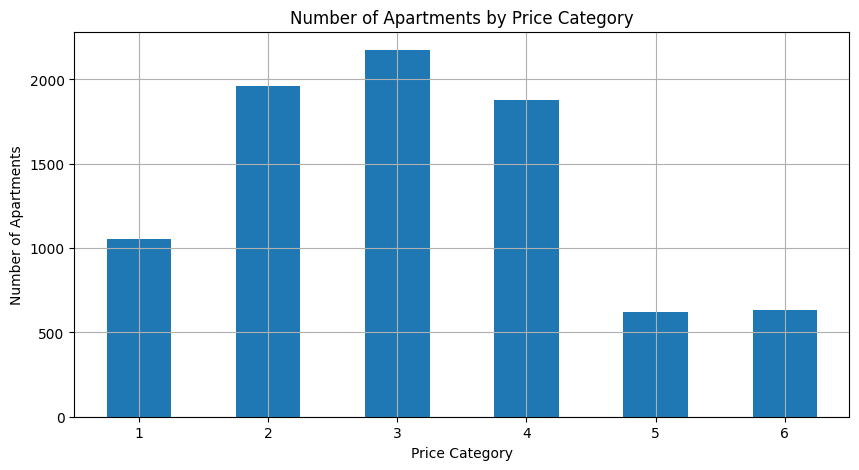

In [5]:

data["price_category"] = pd.cut(data["price"], bins=[0, 2000, 2750, 3500, 5500, 7500, np.inf], labels=[1, 2, 3, 4, 5, 6])
data["price_category"].value_counts().sort_index().plot.bar(rot=0, grid=True, figsize=(10, 5))
plt.xlabel("Price Category")
plt.ylabel("Number of Apartments")
plt.title("Number of Apartments by Price Category")
plt.show()

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(data, data["price_category"]):
    strat_train_set = data.loc[train_index]
    strat_test_set = data.loc[test_index]
    
 
data = strat_train_set.copy()   


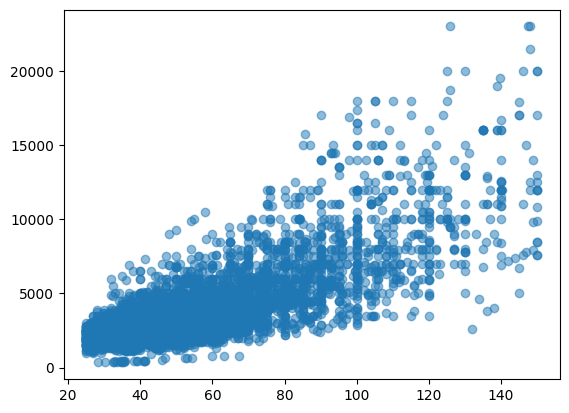

In [6]:
#plot the price against the square meters
plt.scatter(x="squareMeters", y="price", data=data, alpha=0.5)

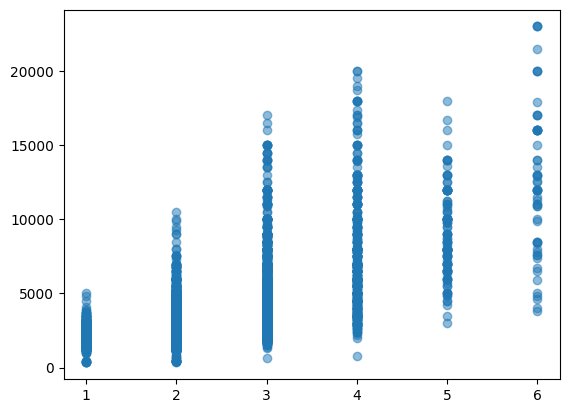

In [7]:

#plot the price against the number of rooms
plt.scatter(x="rooms", y="price", data=data, alpha=0.5)

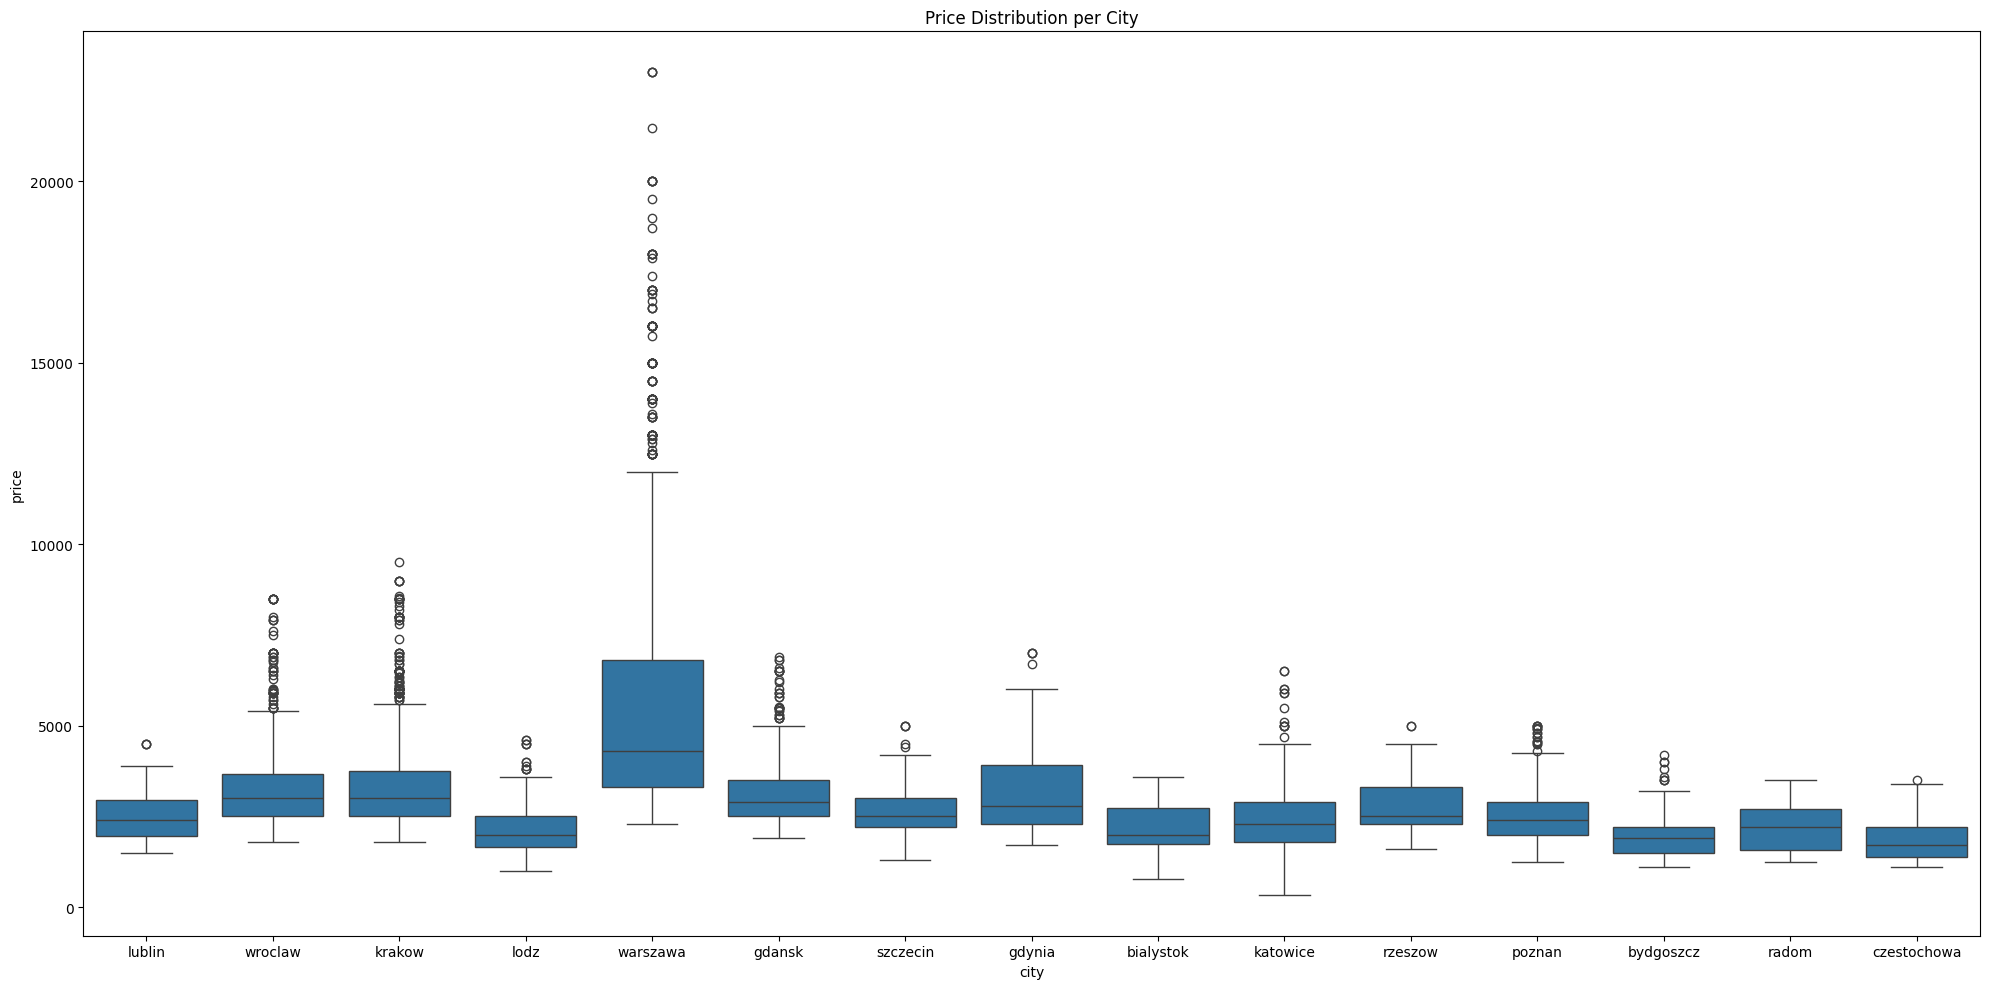

In [8]:
#price distribution per city

plt.figure(figsize=(20, 10))
sns.boxplot(x="city", y="price", data=data)
plt.title("Price Distribution per City")

plt.tight_layout()
plt.show()


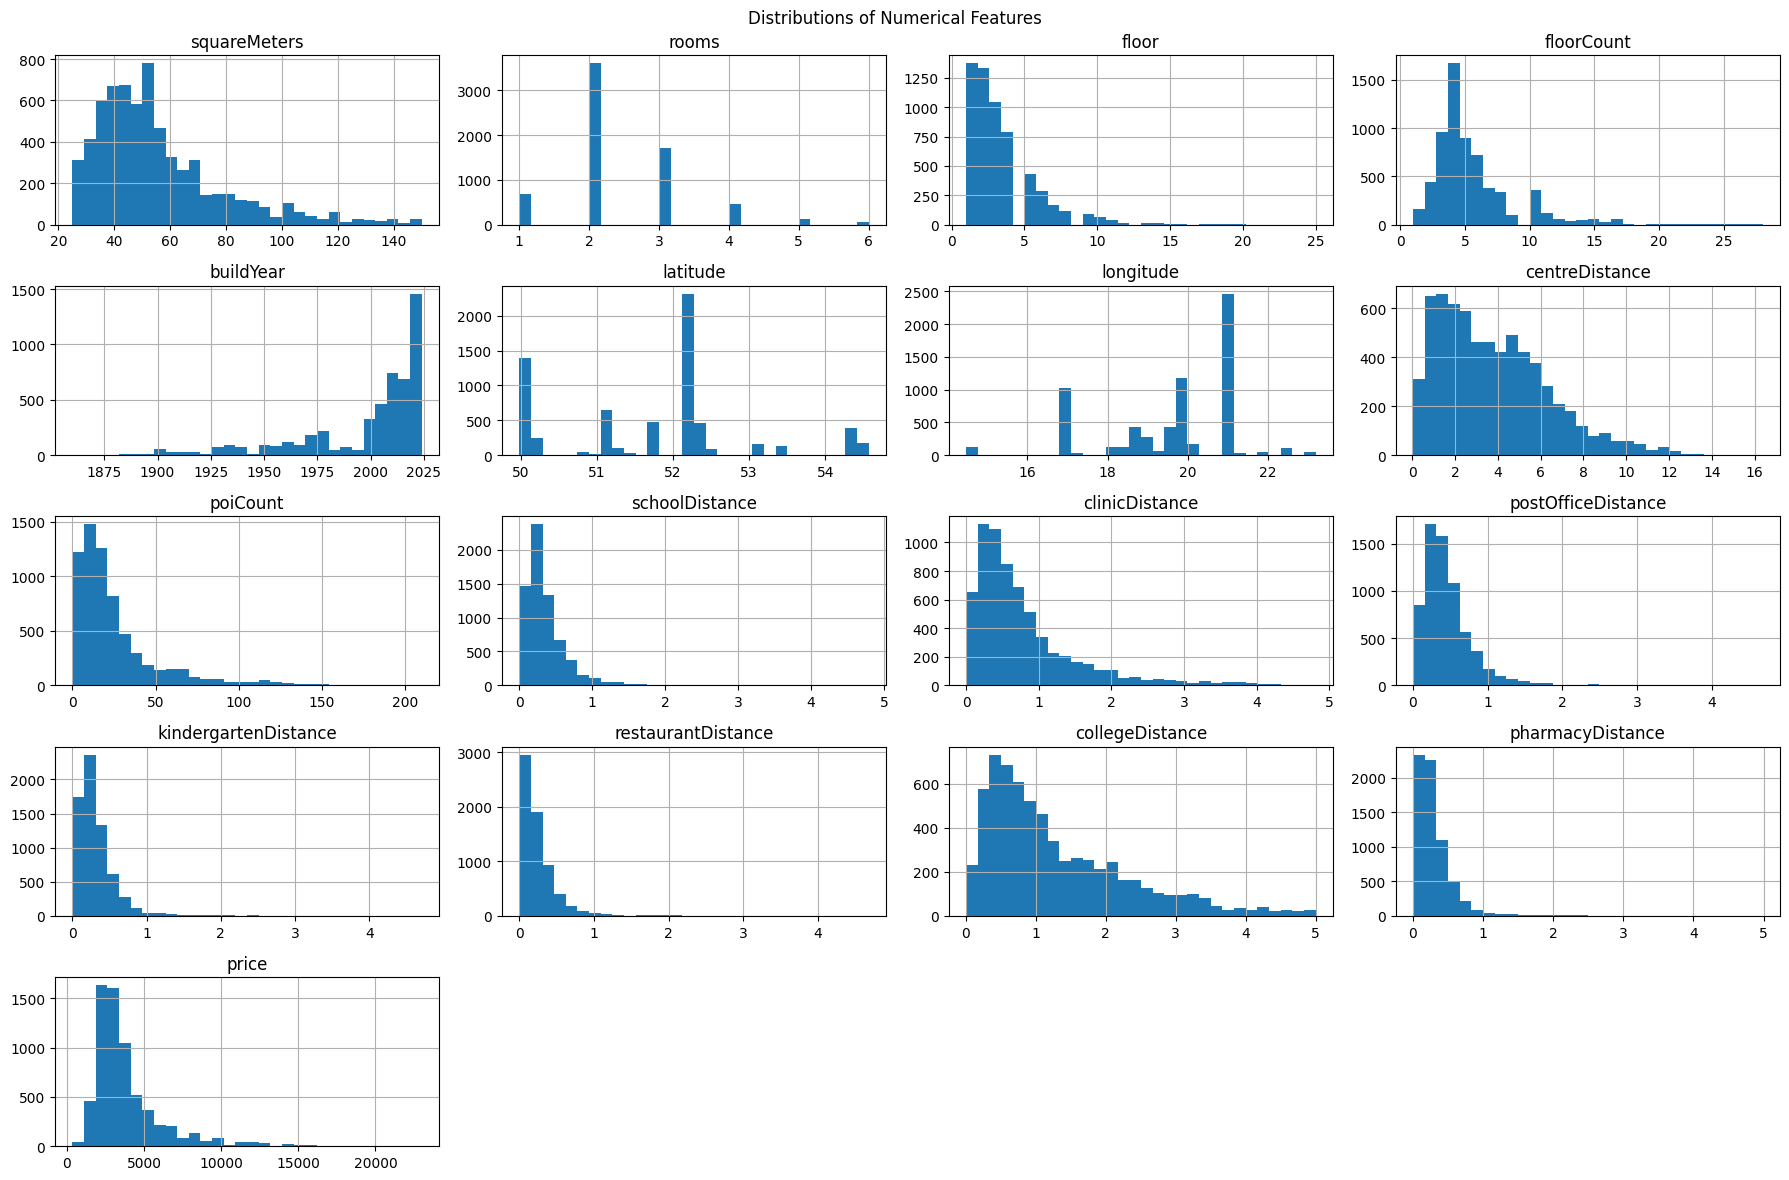

In [9]:
#Distribution of numerical features
data.hist(bins=30, figsize=(18, 12))
plt.suptitle("Distributions of Numerical Features")
plt.tight_layout()
plt.show()


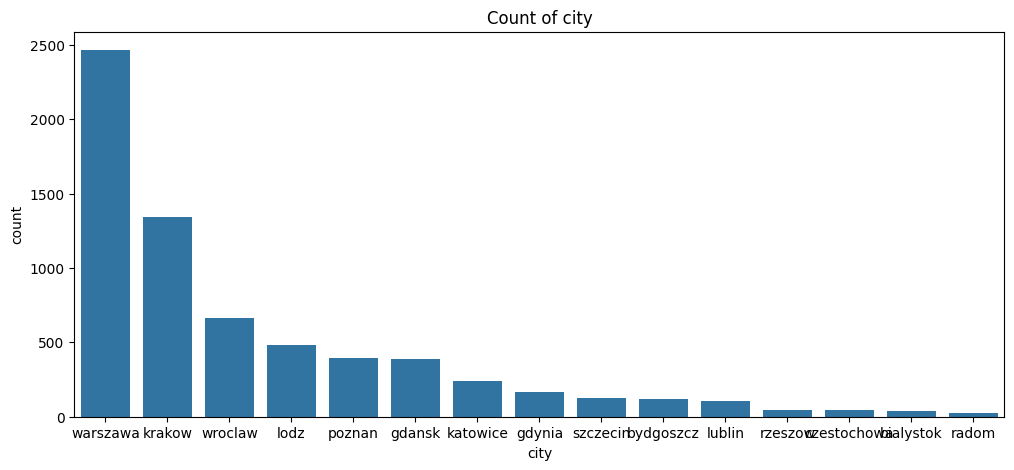

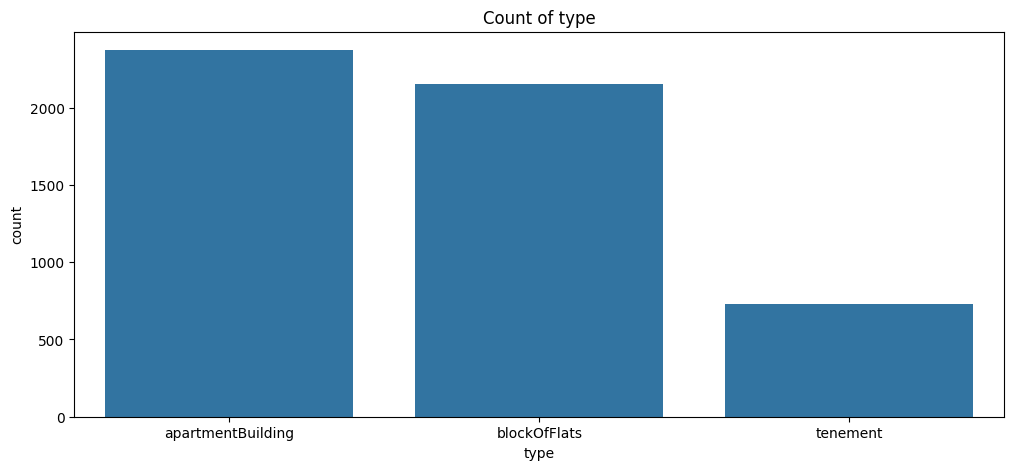

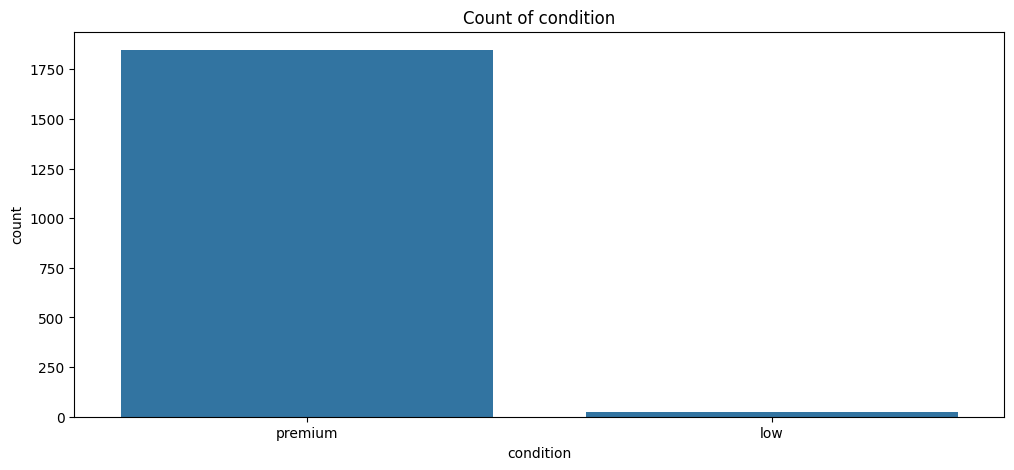

In [10]:
#Count of city
for col in ["city", "type", "condition"]:
    plt.figure(figsize=(12, 5))
    sns.countplot(data=data, x=col, order=data[col].value_counts().index)
    plt.title(f"Count of {col}")
    plt.show()

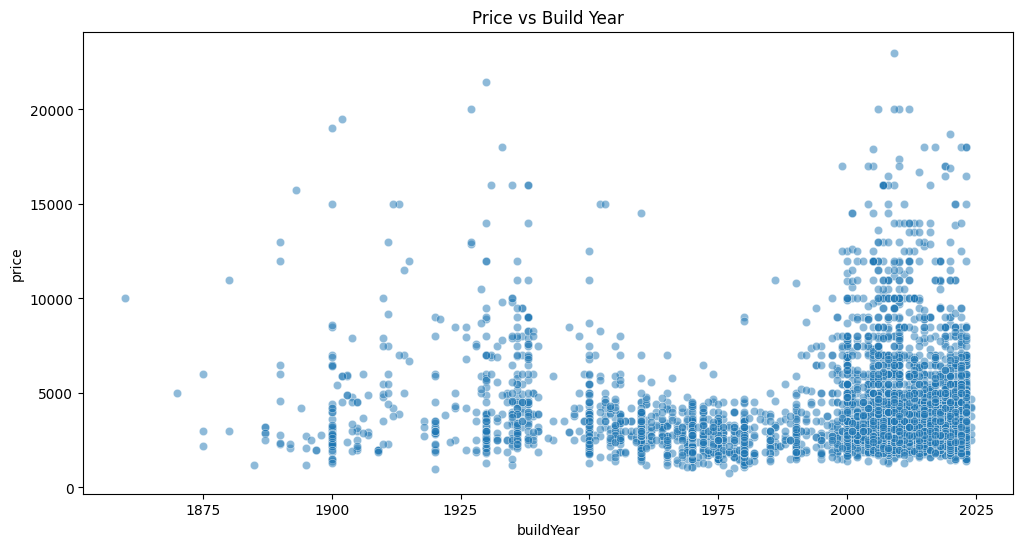

In [11]:
#Price vs build year
plt.figure(figsize=(12, 6))
sns.scatterplot(data=data, x="buildYear", y="price", alpha=0.5)
plt.title("Price vs Build Year")
plt.show()

Checking the distribution of binary features against price

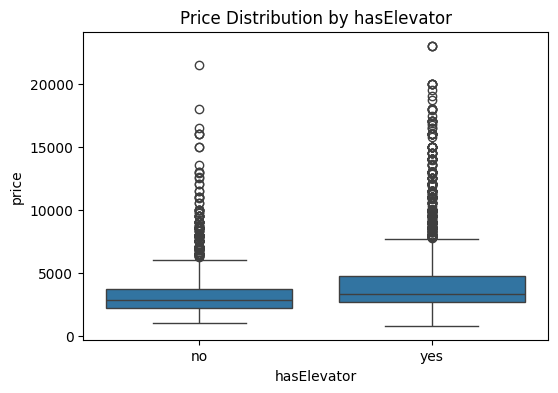

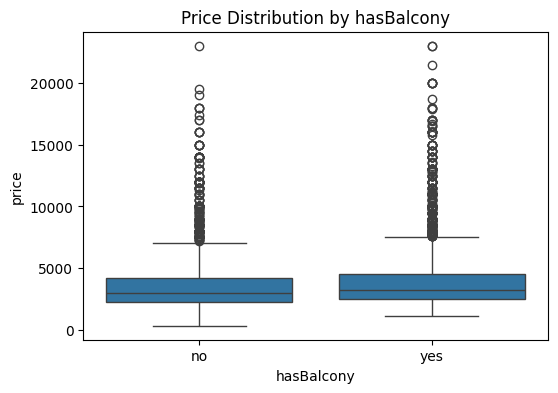

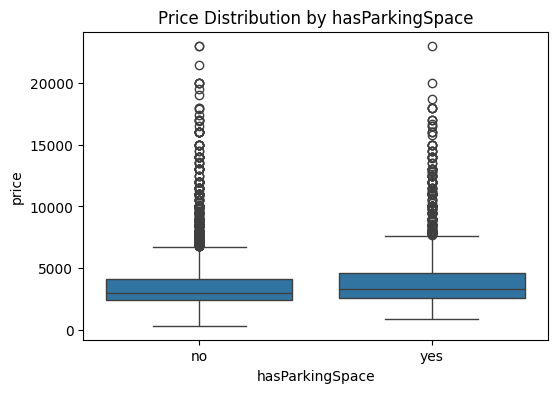

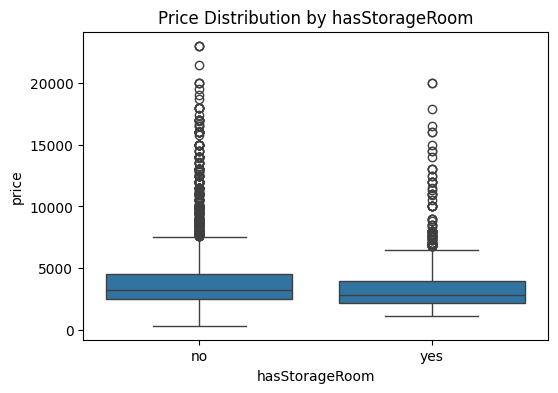

In [12]:
binary_features = ["hasElevator", "hasBalcony", "hasParkingSpace", "hasStorageRoom"]

for feature in binary_features:
    plt.figure(figsize=(6,4))
    sns.boxplot(x=feature, y="price", data=data)
    plt.title(f"Price Distribution by {feature}")
    plt.show()

Checking the distribution of categorical features against price

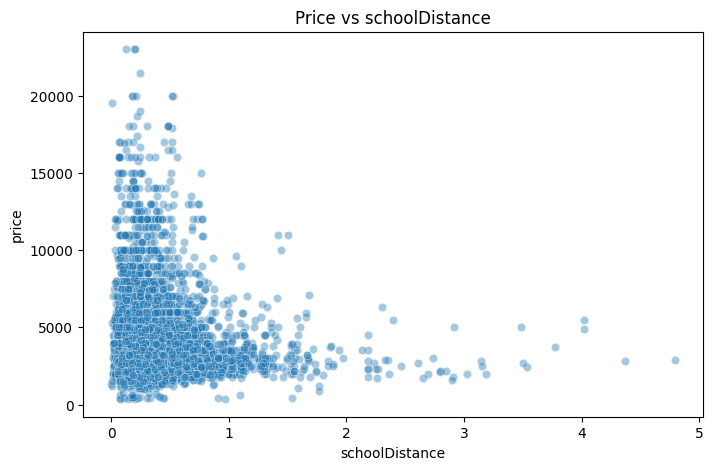

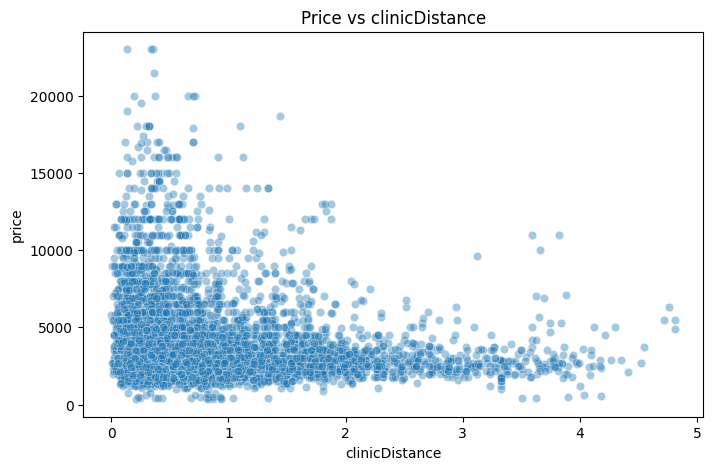

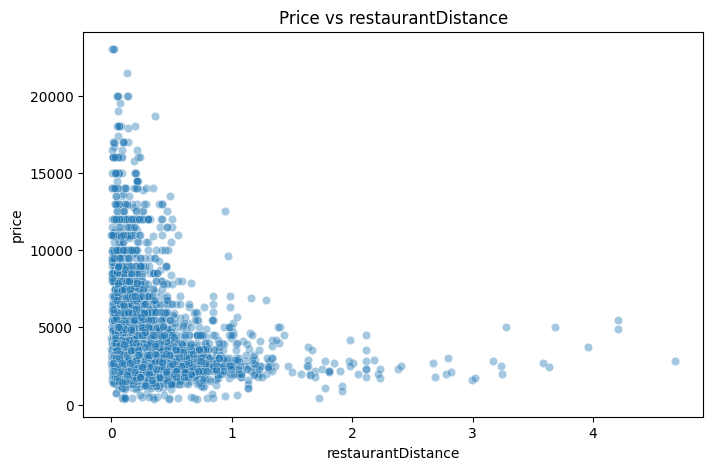

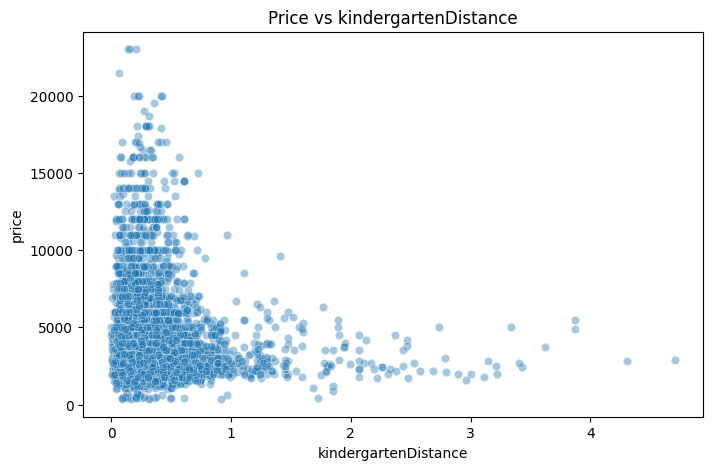

In [13]:
features = ["schoolDistance", "clinicDistance", "restaurantDistance", "kindergartenDistance"]

for col in features:
    plt.figure(figsize=(8,5))
    sns.scatterplot(data=data, x=col, y="price", alpha=0.4)
    plt.title(f"Price vs {col}")
    plt.show()

Spliting into numerical and categorical and imputing missing values

In [14]:
numerical = ["squareMeters", "rooms", "floor", "floorCount", "buildYear","latitude",
"longitude",
"centreDistance",           
"poiCount",                
"schoolDistance",            
"clinicDistance" ,            
"postOfficeDistance" ,        
"kindergartenDistance",      
"restaurantDistance",    
"pharmacyDistance",                     
"price"                     ]

categorical = ["city", "type", "ownership",                  
"buildingMaterial",        
"condition",               
"hasParkingSpace",         
"hasBalcony",               
"hasElevator",              
"hasSecurity",                
"hasStorageRoom" ]


data_num = data.loc[:, numerical]
data_cat = data.loc[:, categorical]

strat_test_set_num = strat_test_set.loc[:, numerical]
strat_test_set_cat = strat_test_set.loc[:, categorical]

imp = IterativeImputer(max_iter=10, random_state=0) 
imp.fit(data_num)
data_num = imp.transform(data_num)
data_num = pd.DataFrame(data_num, columns=numerical)

imp.fit(strat_test_set_num)
strat_test_set_num = imp.transform(strat_test_set_num)
strat_test_set_num = pd.DataFrame(strat_test_set_num, columns=numerical)


data_num["floor"] = data_num["floor"].round(0)
data_num["floorCount"] = data_num["floorCount"].round(0)
data_num["buildYear"] = data_num["buildYear"].round(0)

strat_test_set_num["floor"] = strat_test_set_num["floor"].round(0)
strat_test_set_num["floorCount"] = strat_test_set_num["floorCount"].round(0)
strat_test_set_num["buildYear"] = strat_test_set_num["buildYear"].round(0)

imp_cat = SimpleImputer(strategy='most_frequent')
imp_cat.fit(data_cat)
data_cat = imp_cat.transform(data_cat)
data_cat = pd.DataFrame(data_cat, columns=categorical)
imp_cat.fit(strat_test_set_cat)
strat_test_set_cat = imp_cat.transform(strat_test_set_cat)
strat_test_set_cat = pd.DataFrame(strat_test_set_cat, columns=categorical)

data = pd.concat([data_cat, data_num], axis=1)
strat_test_set = pd.concat([strat_test_set_cat, strat_test_set_num], axis=1)

In [15]:
#Feature engineering
avg_rooom_square = data["squareMeters"] / data["rooms"]
data["avg_room_square"] = avg_rooom_square
numerical.append("avg_room_square")

avg_rooom_square_test = strat_test_set["squareMeters"] / strat_test_set["rooms"]
strat_test_set["avg_room_square"] = avg_rooom_square_test


<Axes: >

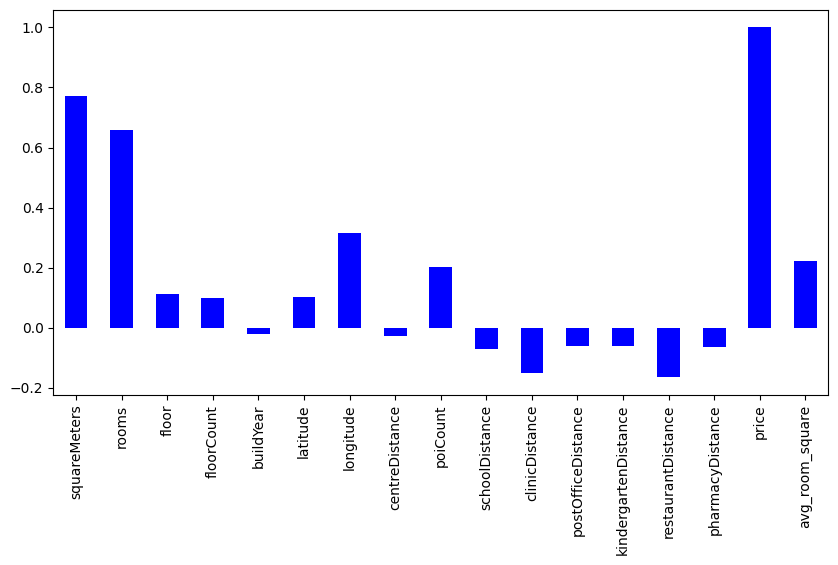

In [16]:
#Plotting the correlation matrix
datacor = data[numerical].copy()
corr_matrix = datacor.corr()
corr_matrix["price"] = corr_matrix["price"].copy()
corr_matrix["price"] = corr_matrix["price"].sort_values(ascending=False)

corr_matrix["price"].plot(kind="bar", figsize=(10, 5), color="blue")

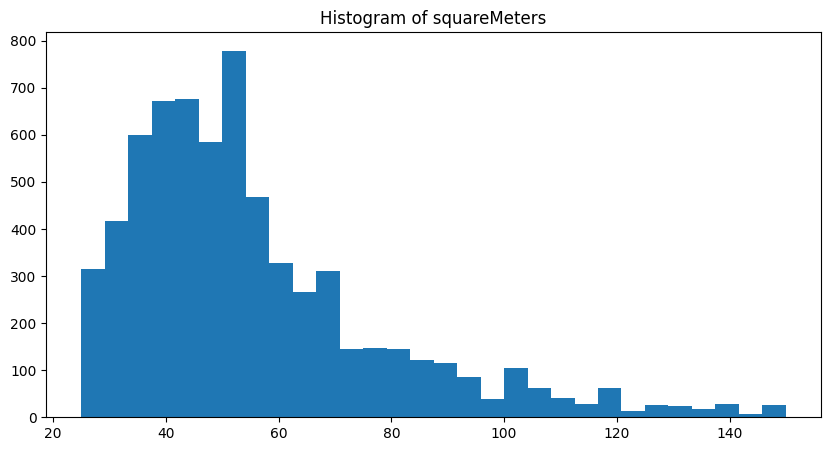

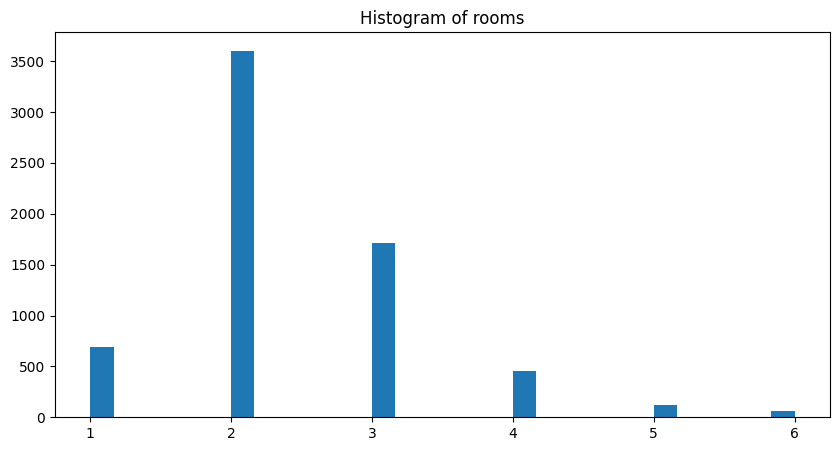

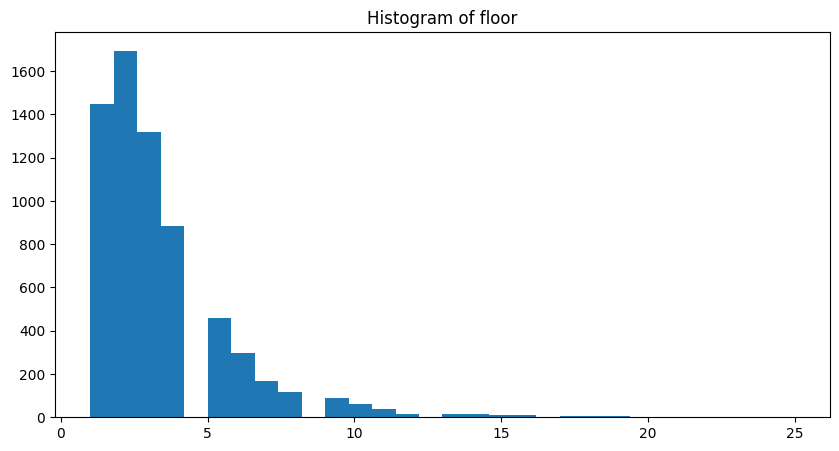

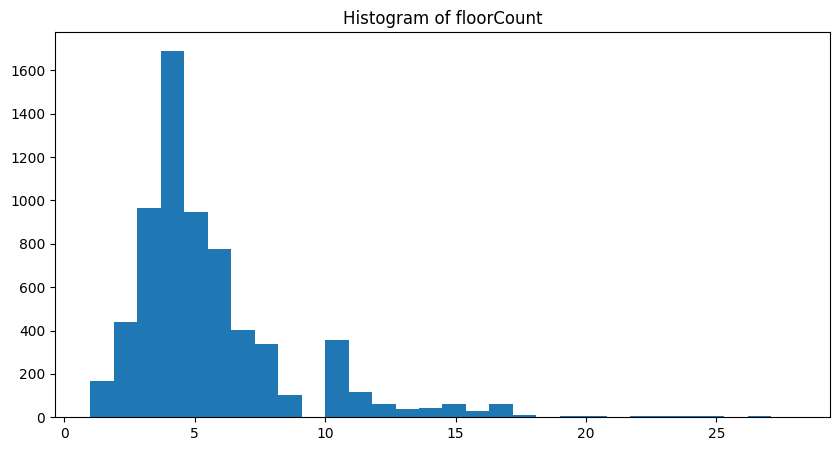

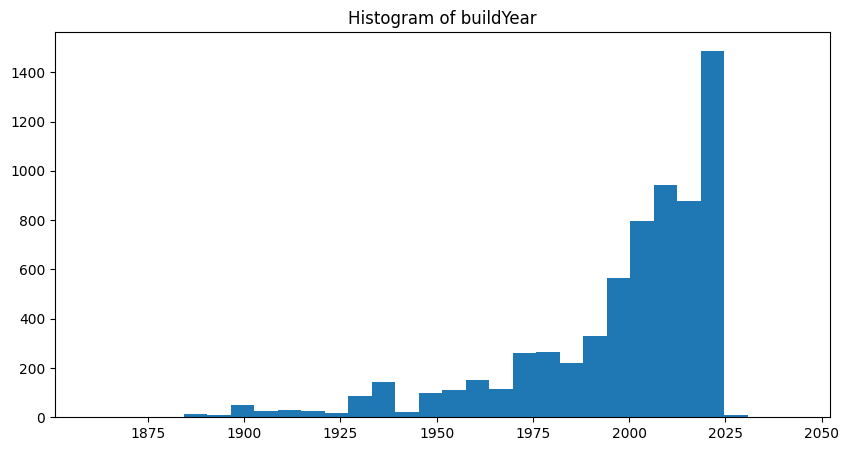

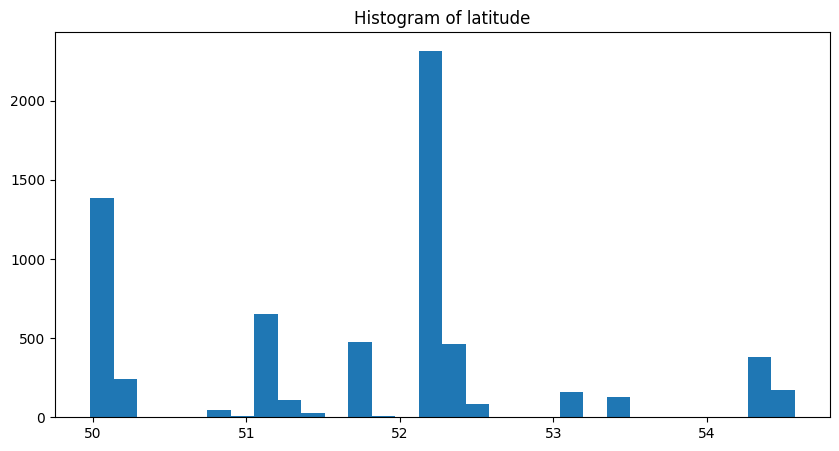

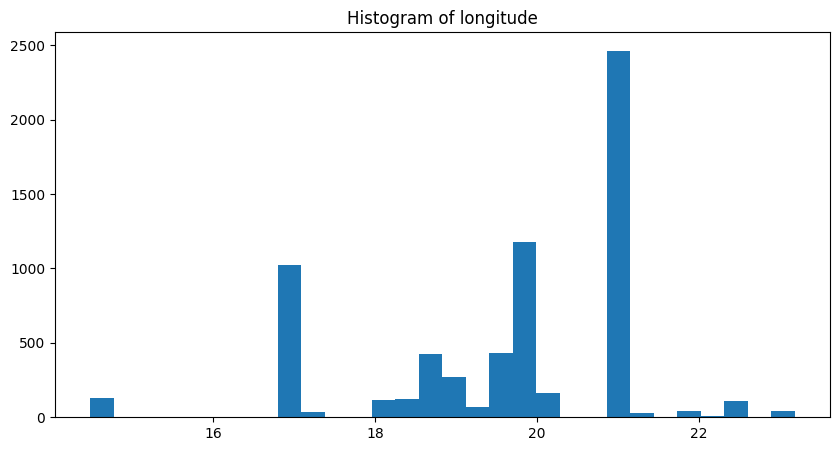

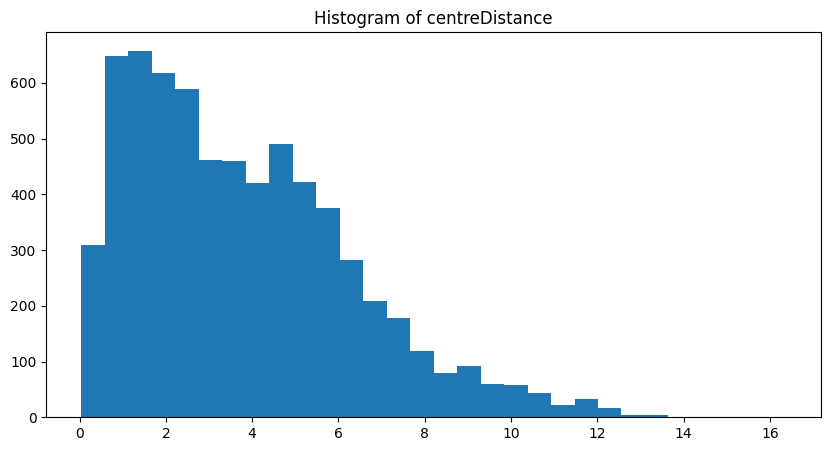

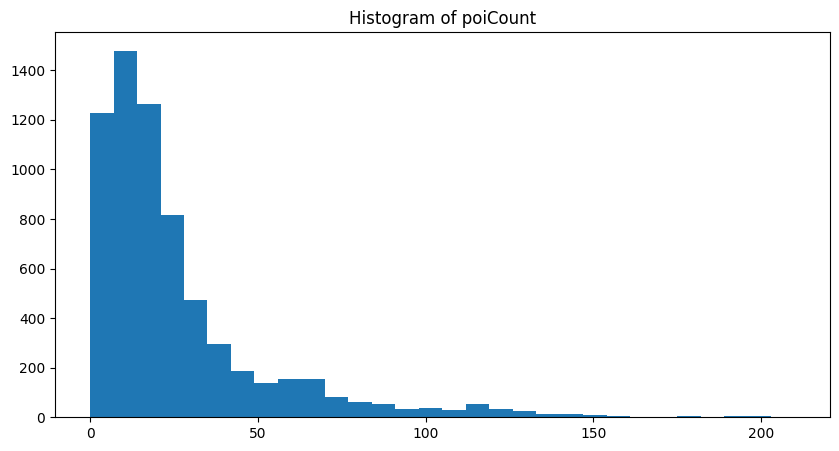

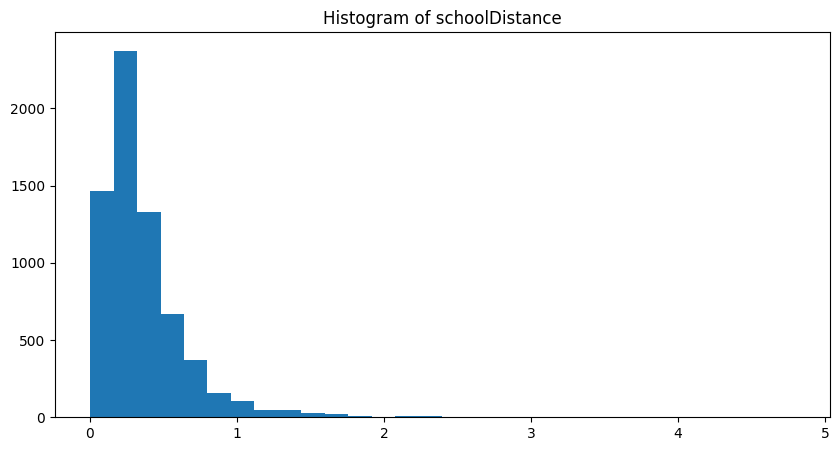

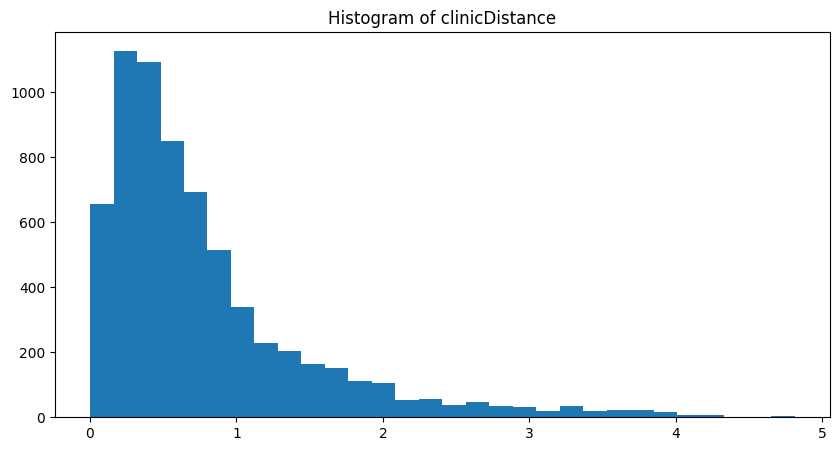

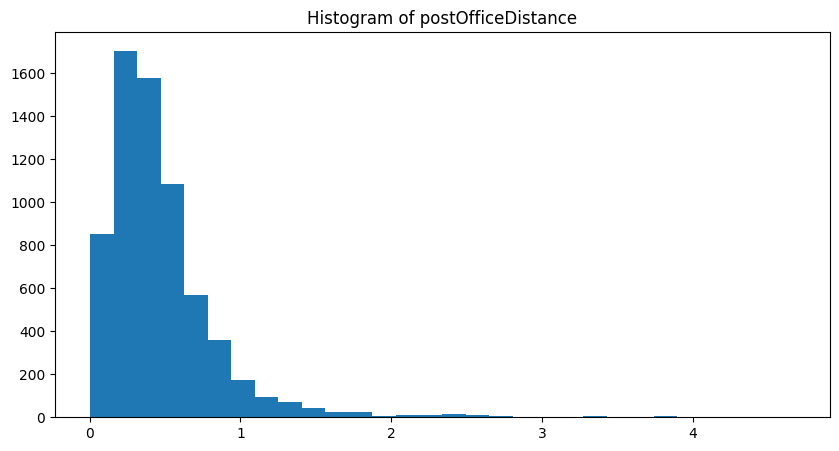

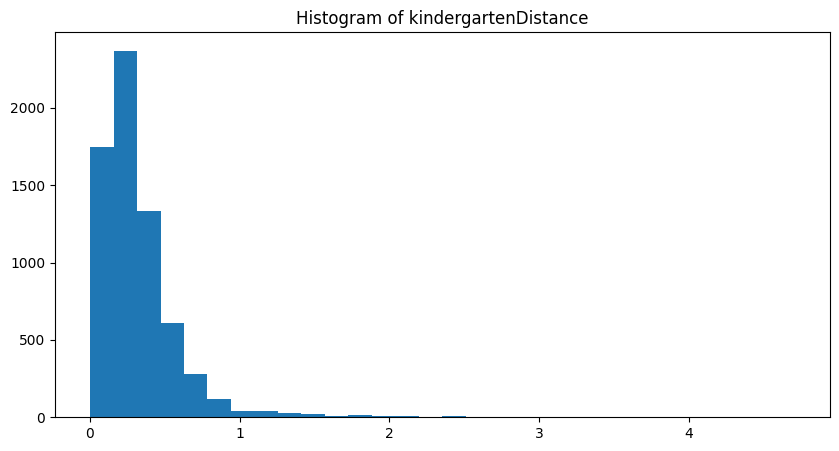

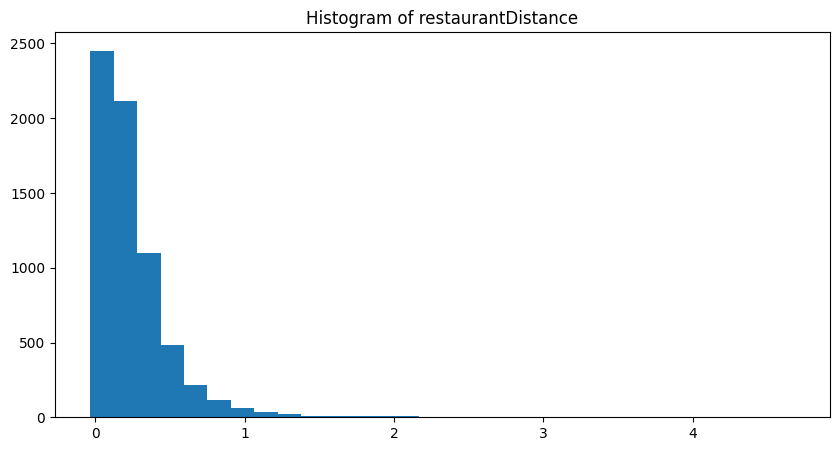

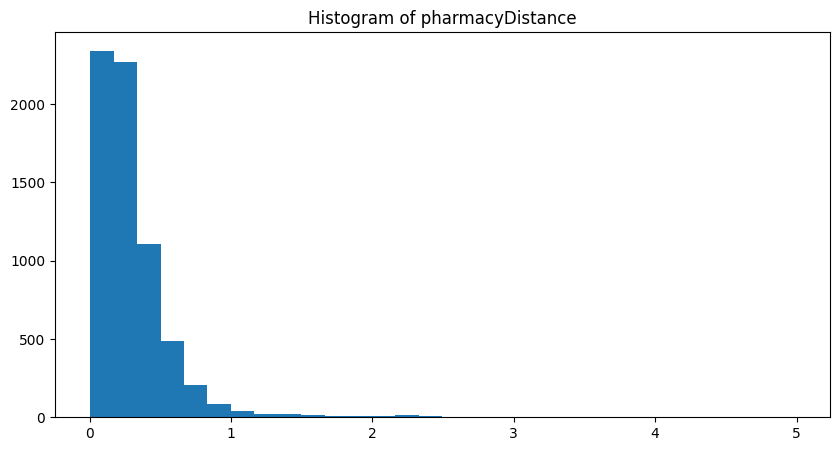

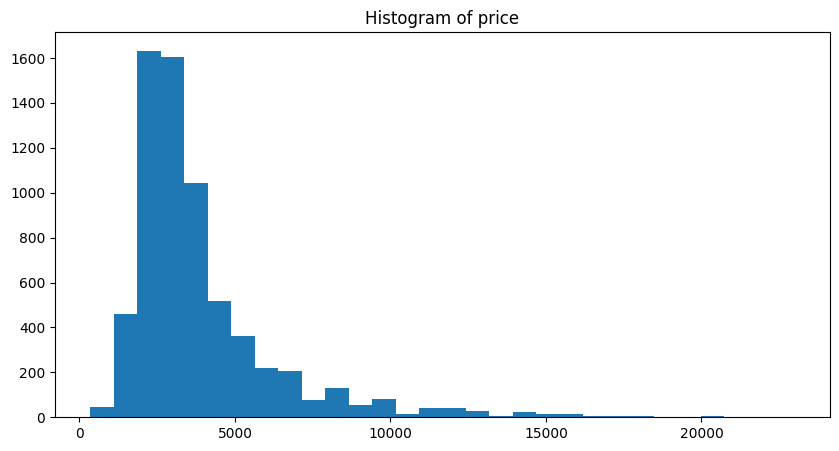

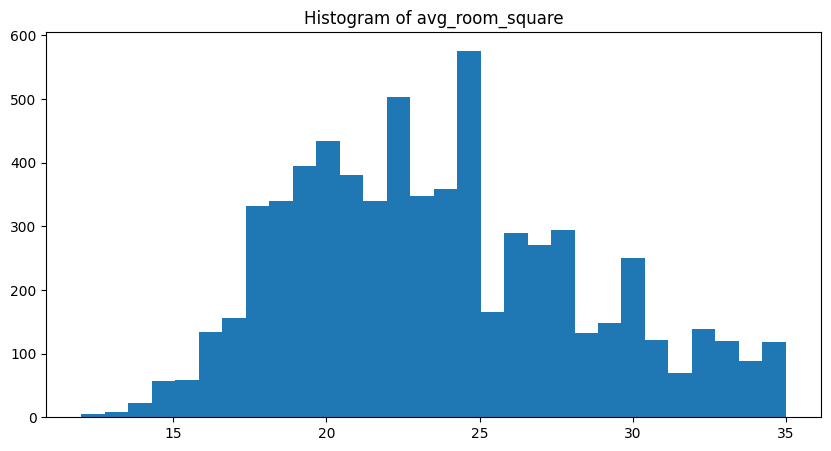

In [17]:
#Plotting histograms of numerical features
for variable in data[numerical]:
    plt.figure(figsize=(10, 5))
    plt.hist(x=variable, data=data, bins=30)
    plt.title(f"Histogram of {variable}")
    plt.show()

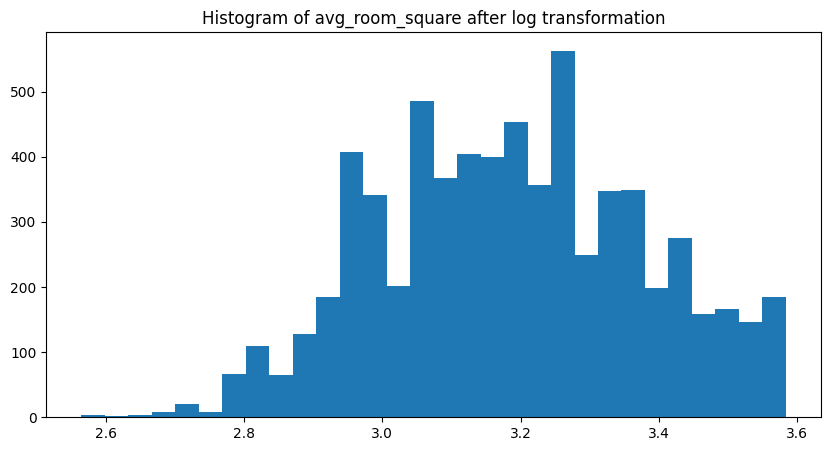

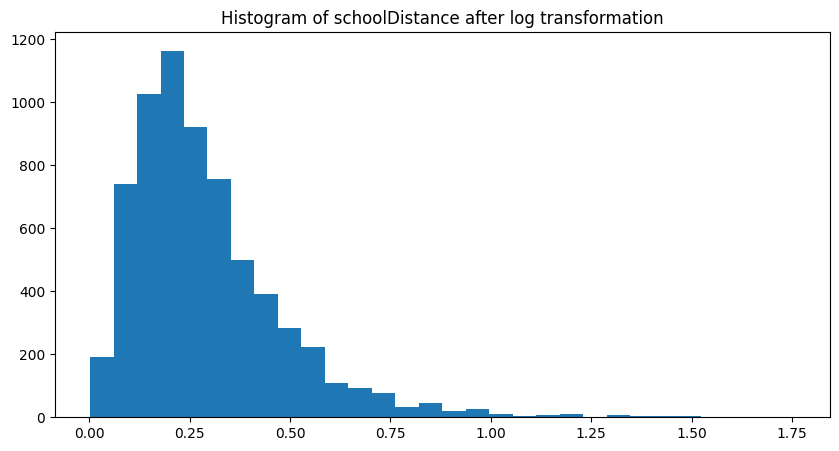

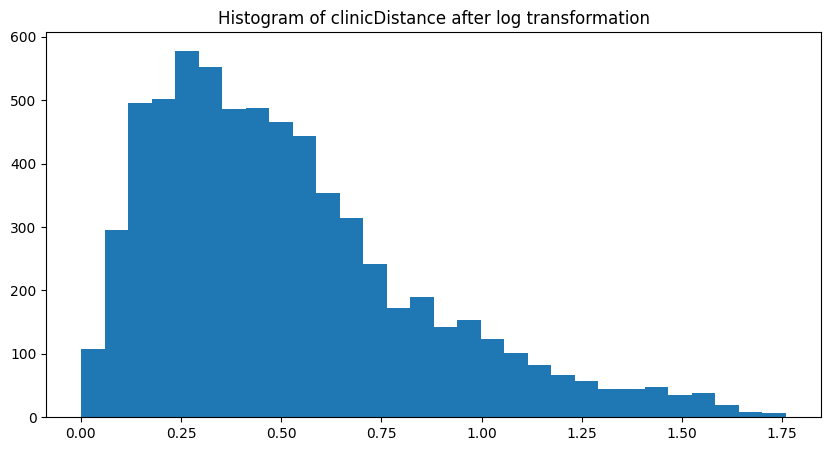

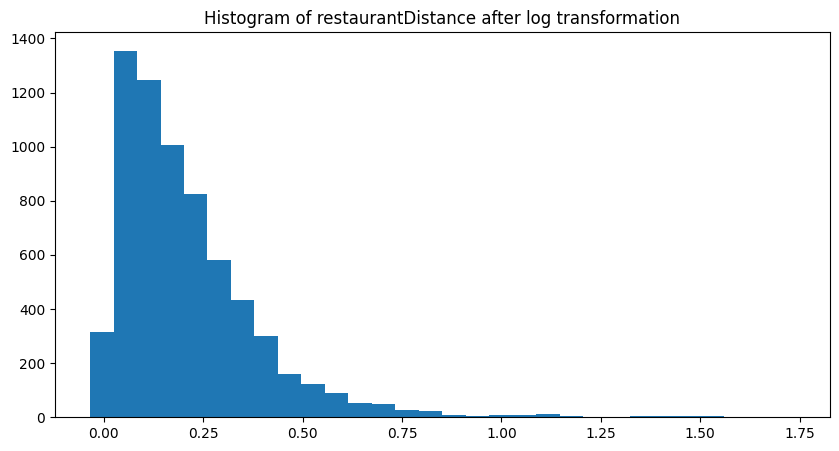

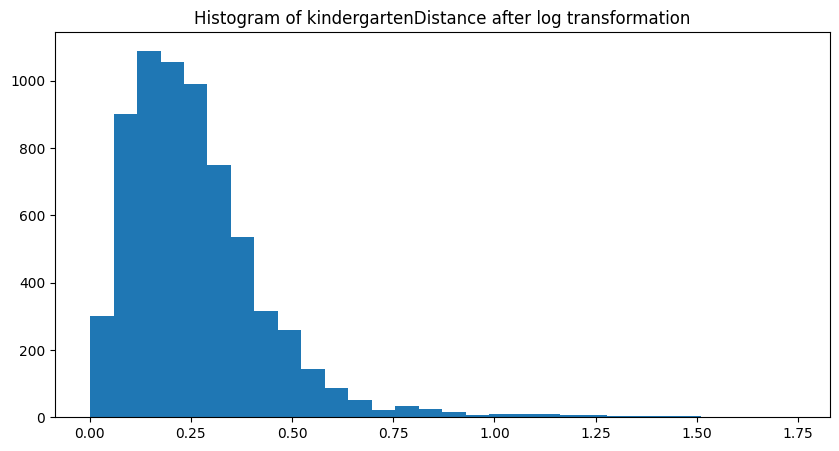

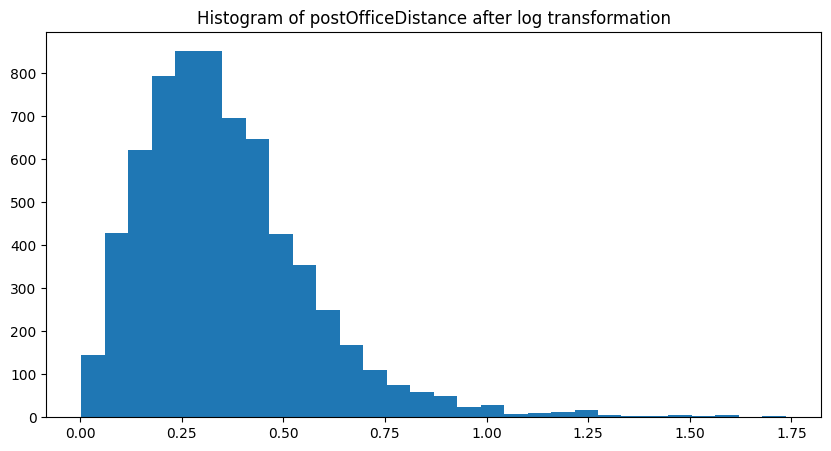

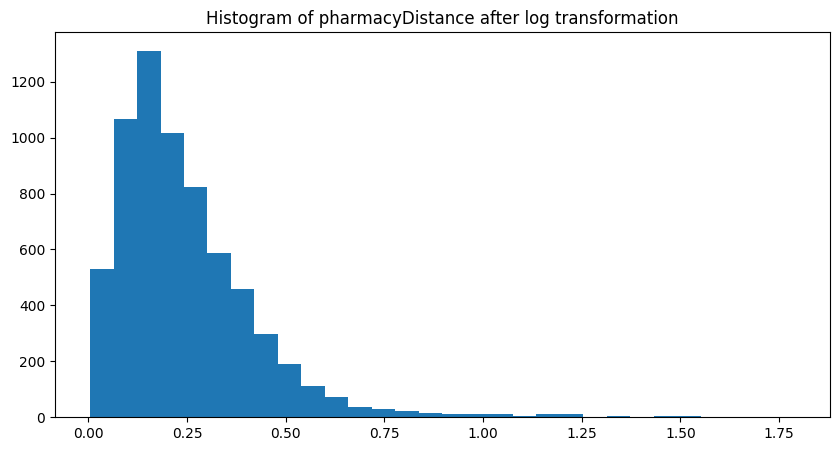

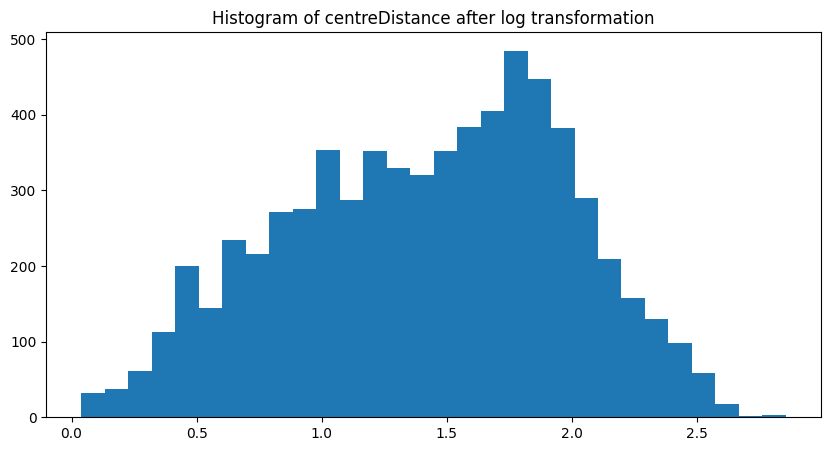

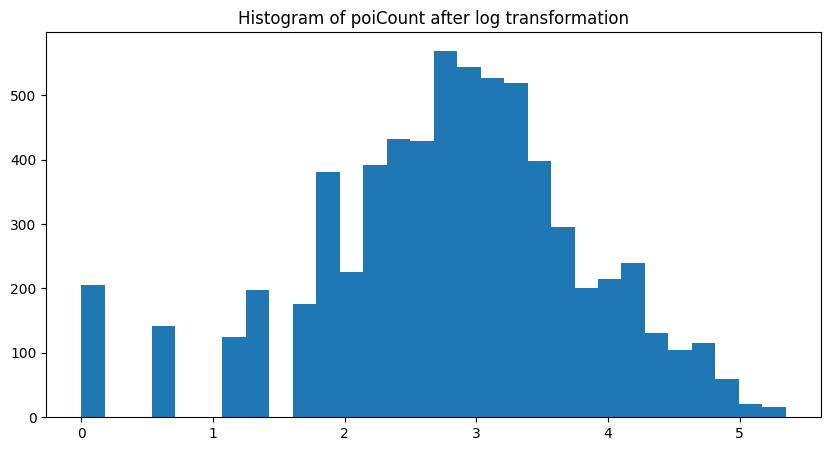

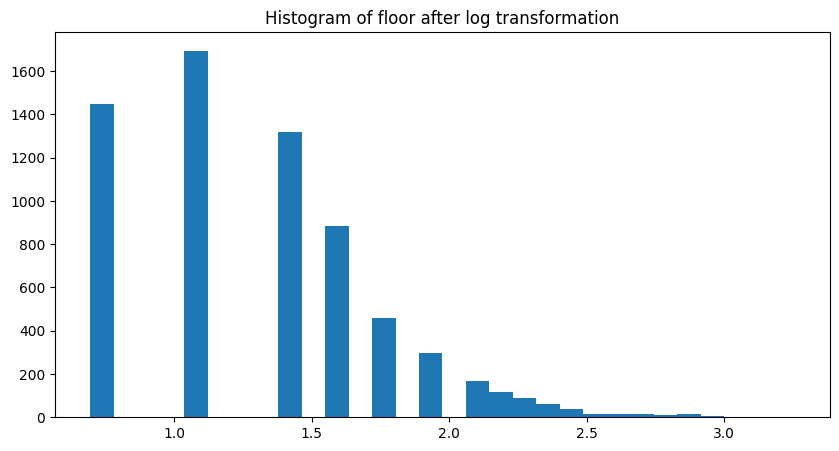

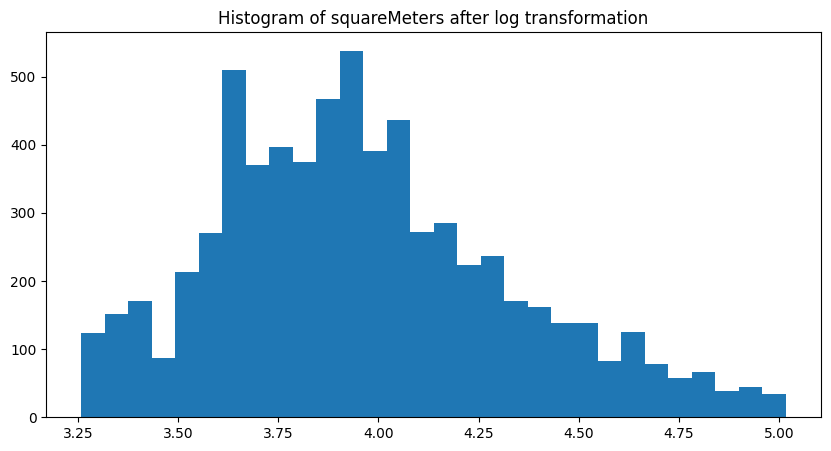

In [18]:
#Plotting histograms of logged variables
variables_to_log = [
    "avg_room_square",
    "schoolDistance",
    "clinicDistance",
    "restaurantDistance",
    "kindergartenDistance",
    "postOfficeDistance",
    "pharmacyDistance",
    "centreDistance",
    "poiCount",
    "floor",
    "squareMeters",
    
    
]


for variable in variables_to_log:
    data[variable] = np.log1p(data[variable])
    strat_test_set[variable] = np.log1p(strat_test_set[variable])
    plt.figure(figsize=(10, 5))
    plt.hist(x=variable, data=data, bins=30)
    plt.title(f"Histogram of {variable} after log transformation")



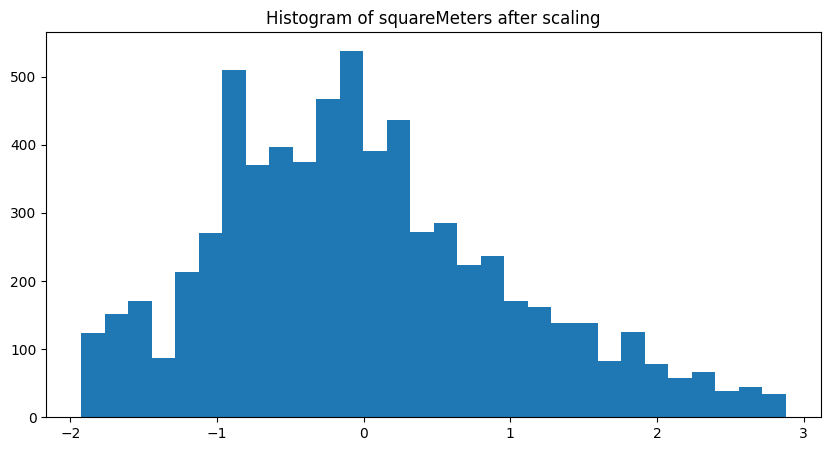

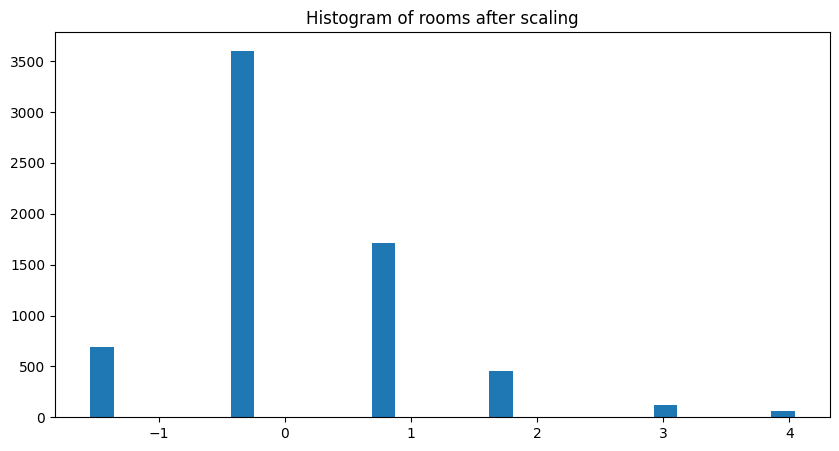

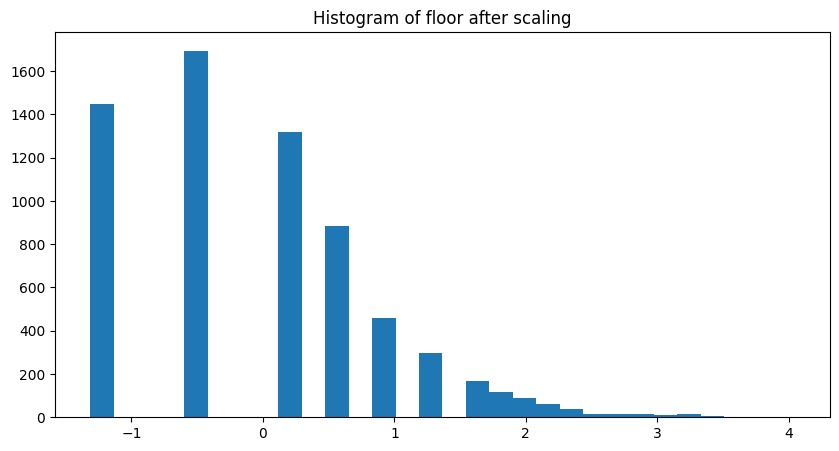

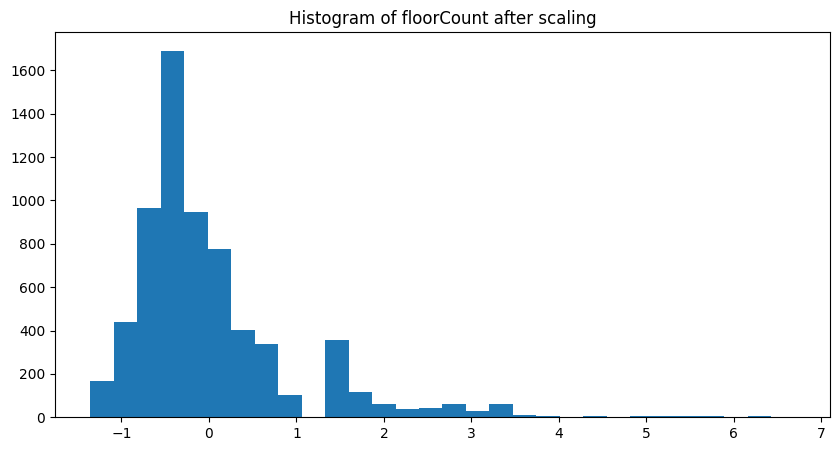

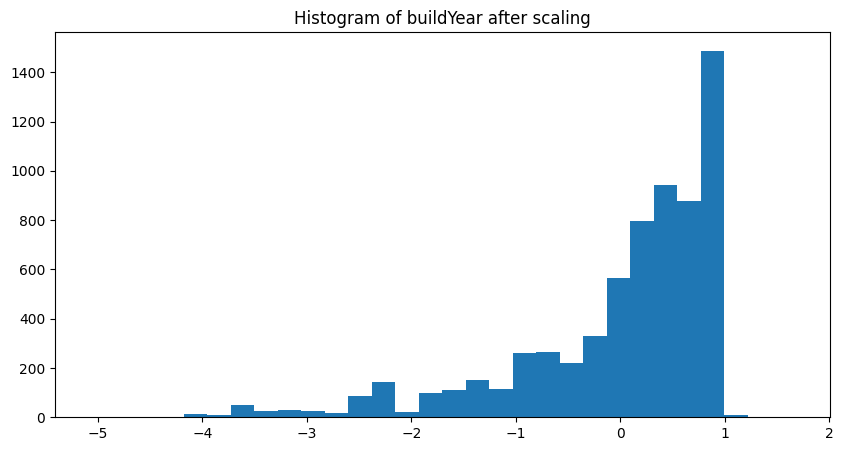

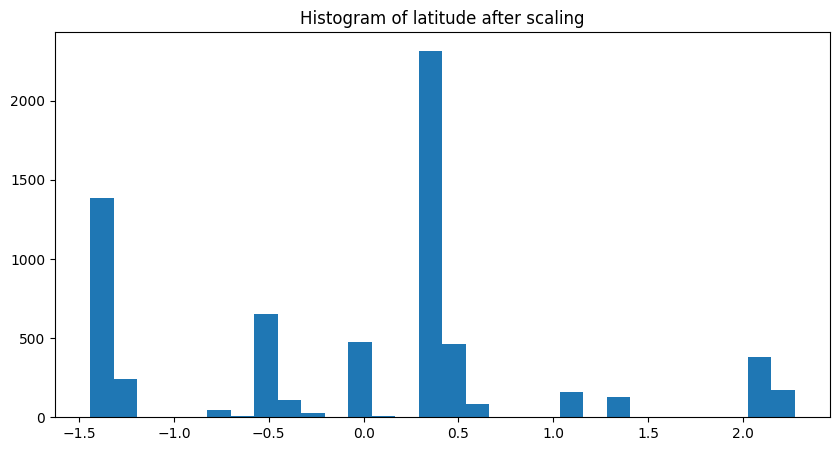

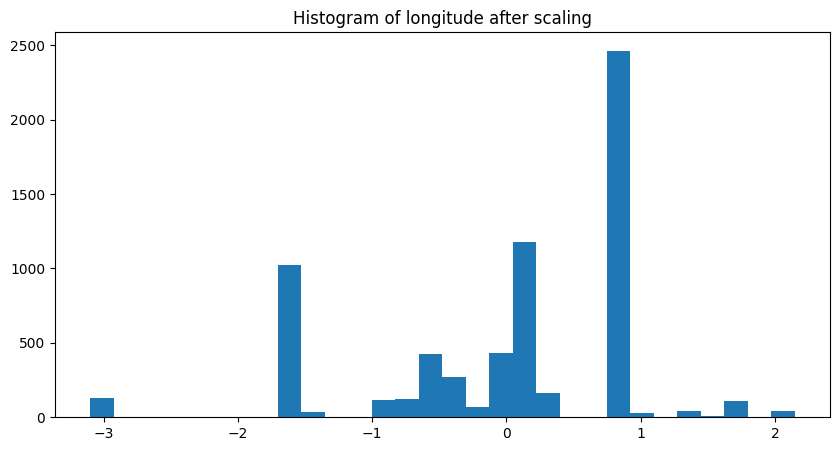

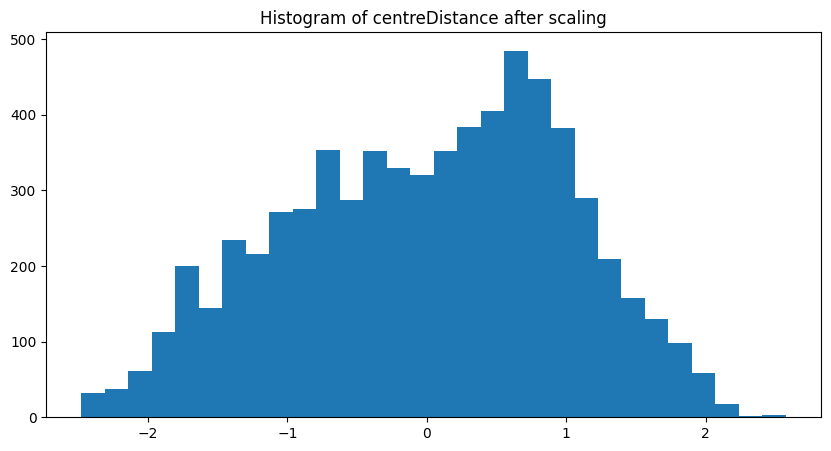

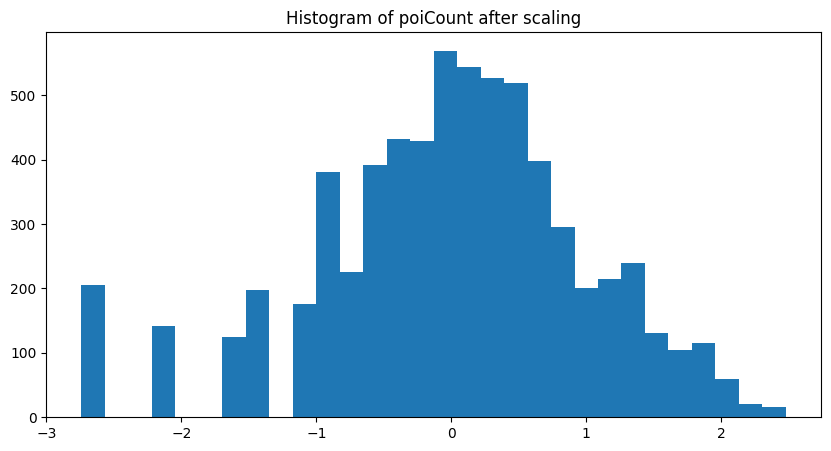

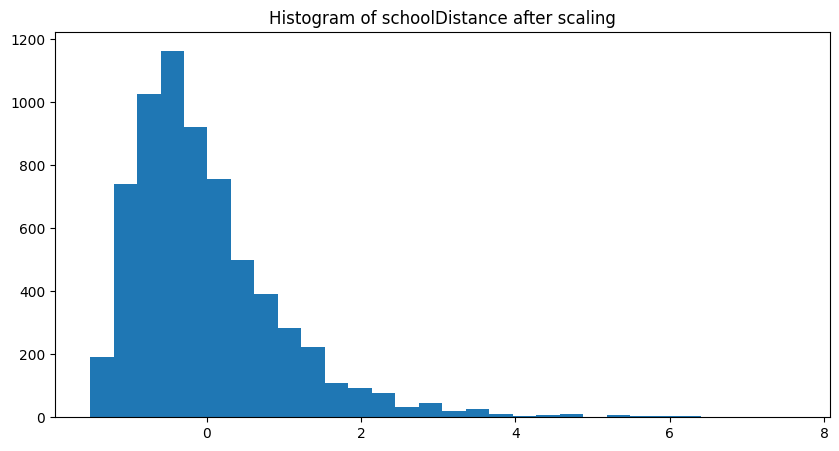

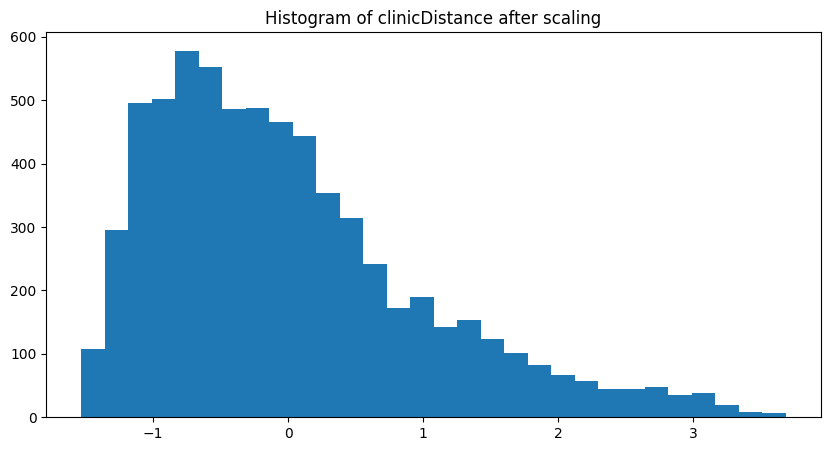

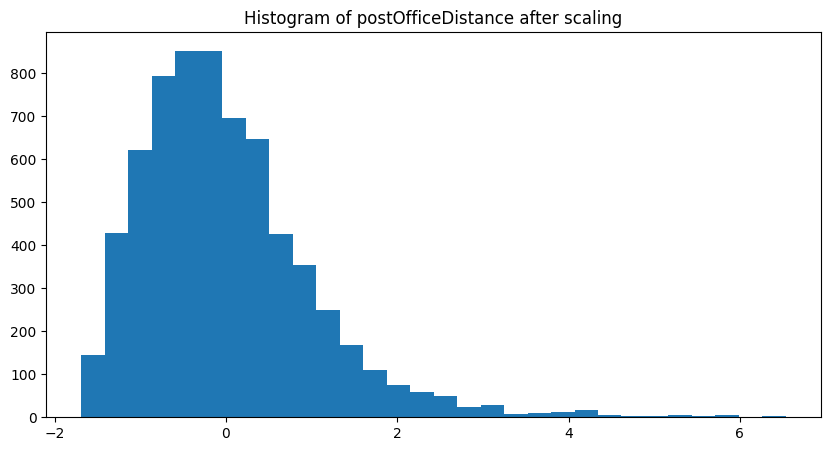

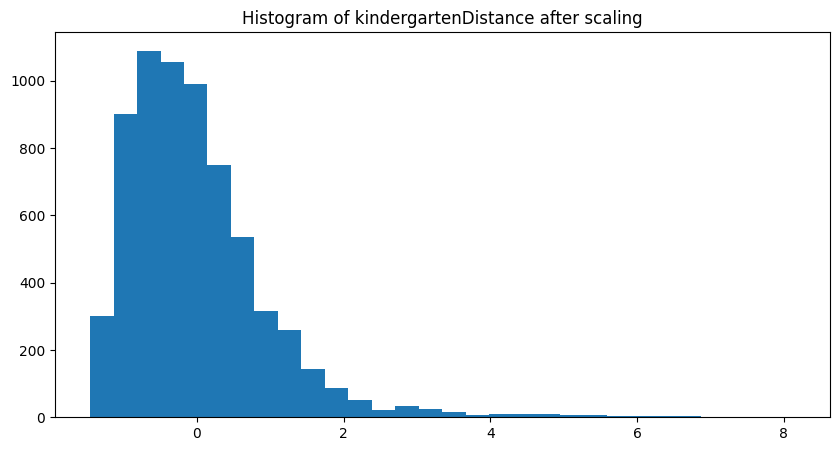

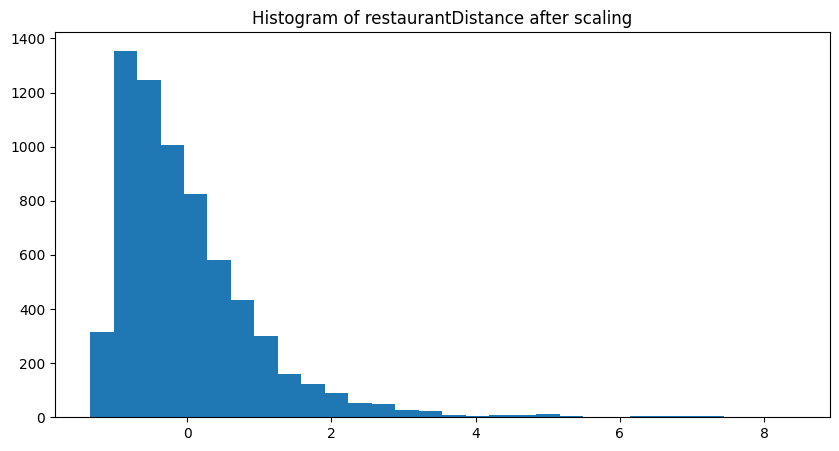

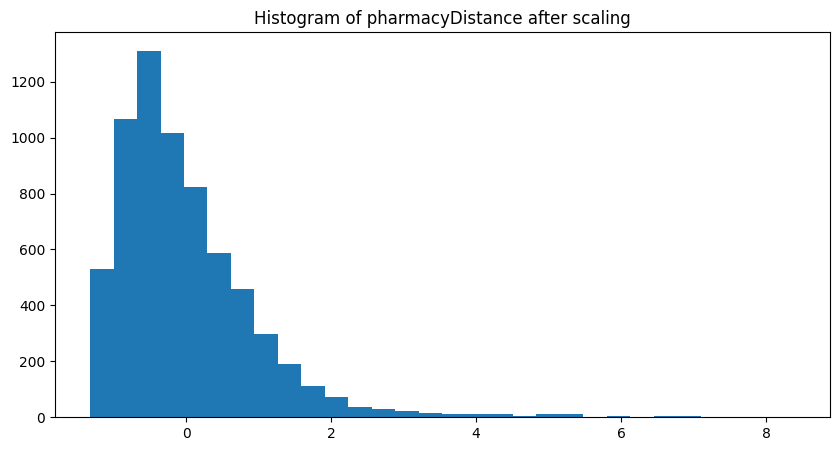

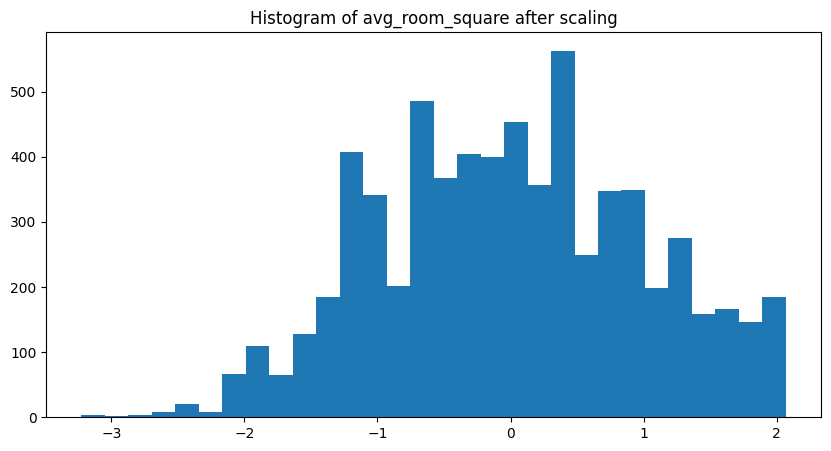

In [19]:
#Scaling the variables and plotting their histograms
variables_to_scale = [
   "squareMeters", "rooms", "floor", "floorCount", "buildYear","latitude",
"longitude",
"centreDistance",           
"poiCount",                
"schoolDistance",            
"clinicDistance" ,            
"postOfficeDistance" ,        
"kindergartenDistance",      
"restaurantDistance",    
"pharmacyDistance",
"avg_room_square"                   

]

for variable in variables_to_scale:
    scaler = StandardScaler()
    data[variable] = scaler.fit_transform(data[[variable]])
    strat_test_set[variable] = scaler.fit_transform(strat_test_set[[variable]])
    plt.figure(figsize=(10, 5))
    plt.hist(x=variable, data=data, bins=30)
    plt.title(f"Histogram of {variable} after scaling")
    plt.show()



In [20]:
#Encoding categorical variables

df_encoded = pd.get_dummies(data[categorical])
df_encoded
df_encoded_test = pd.get_dummies(strat_test_set[categorical])       


datas = data[variables_to_scale].copy()
datas_test = strat_test_set[variables_to_scale].copy()


datas = pd.concat([datas, df_encoded], axis=1)
datas_test = pd.concat([datas_test, df_encoded_test], axis=1)



In [21]:
#Getting rid of unnecessary columns
pd.set_option('display.max_columns', None)
datas

datas = datas.drop(columns=["latitude", "longitude", "city_bialystok", "type_tenement", "ownership_condominium", "condition_low", "condition_premium", "hasParkingSpace_no", "hasBalcony_yes", "hasElevator_no", "hasElevator_yes", "hasStorageRoom_no", "hasStorageRoom_yes", "hasSecurity_no", "hasSecurity_yes", "buildingMaterial_brick", "buildingMaterial_concreteSlab", ])
datas_test = datas_test.drop(columns=["latitude", "longitude", "city_bialystok", "type_tenement", "ownership_condominium", "condition_low", "condition_premium", "hasParkingSpace_no", "hasBalcony_yes", "hasElevator_no", "hasElevator_yes", "hasStorageRoom_no", "hasStorageRoom_yes", "hasSecurity_no", "hasSecurity_yes", "buildingMaterial_brick", "buildingMaterial_concreteSlab"])

In [22]:
datas

,squareMeters,rooms,floor,floorCount,buildYear,centreDistance,poiCount,schoolDistance,clinicDistance,postOfficeDistance,kindergartenDistance,restaurantDistance,pharmacyDistance,avg_room_square,city_bydgoszcz,city_czestochowa,city_gdansk,city_gdynia,city_katowice,city_krakow,city_lodz,city_lublin,city_poznan,city_radom,city_rzeszow,city_szczecin,city_warszawa,city_wroclaw,type_apartmentBuilding,type_blockOfFlats,hasParkingSpace_yes,hasBalcony_no
0,0.403661,-0.427841,-0.466536,-0.760549,-1.575229,-2.377759,1.580866,-0.893153,-0.407283,-1.328025,1.138356,-1.078997,-0.603236,1.290947,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True
1,-0.817654,-0.427841,-0.466536,-0.760549,0.745415,1.835957,-2.065204,1.382522,0.112469,2.092258,1.331249,2.328122,-0.589010,-0.986359,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,True,False
2,0.218482,0.689448,-1.313617,0.134146,0.929593,0.544069,-1.389044,2.810881,1.294632,0.167600,0.731078,1.061675,0.897659,-1.073694,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,True,True
3,-1.821669,-1.545130,-0.466536,-0.760549,-2.311941,-1.368404,0.473701,0.282397,-0.044876,-0.299305,-0.169059,-0.050158,0.061875,0.573076,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,True
4,-0.551068,-0.427841,0.134478,-0.462317,0.450730,1.371781,-2.065204,1.994247,-0.075558,0.650783,0.719944,1.857126,2.136308,-0.491098,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6649,-0.551068,-0.427841,-1.313617,-0.164086,0.156045,0.475450,-0.036724,-0.774607,-0.462573,-0.932800,-0.714579,-0.032138,-0.636575,-0.491098,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,True,False
6650,0.312641,-0.427841,0.600660,-0.462317,-2.201434,0.244734,-0.402235,-1.192124,0.622739,0.545612,-0.018366,-0.818778,0.688281,1.120561,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True
6651,0.120960,-0.427841,0.981559,0.134146,0.377059,2.035233,0.950085,-0.658703,-1.372219,-0.292251,-1.357788,-1.089883,-1.094854,0.762053,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False
6652,-0.085202,0.689448,-0.466536,-0.462317,-1.354215,0.337012,0.022415,-0.953454,-1.327615,-1.215372,-1.016627,0.927271,-0.845977,-1.630974,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False


In [23]:

#Training the model Linear Regression
lin_reg = LinearRegression()
lin_reg.fit(datas, data["price"])
predictions = lin_reg.predict(datas)
predictions[:5]
data["price"].iloc[:10], predictions[:10]

(0    3300.0
 1    2400.0
 2    4500.0
 3    1200.0
 4    3200.0
 5    3000.0
 6    2600.0
 7    3500.0
 8    5600.0
 9    2600.0
 Name: price, dtype: float64,
 array([3823.21856645, 1303.93697653, 3847.09510075,  721.61483372,
        3501.93580979, 3219.33610378, 2784.57600711, 4207.79236863,
        6520.24466015, 1905.59204539]))

In [24]:
#Checking the performance of the model using RMSE
lin_rmse = mean_squared_error(data["price"], predictions, squared=False)
lin_rmse

1313.777262905644

In [25]:
#Checking the performance of the model using MAE
lim_mae = mean_absolute_error(data["price"], predictions)
lim_mae

867.1102397679672

In [26]:
#Training the model using Decision Tree Regressor   
tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(datas, data["price"])
predictions2 = tree_reg.predict(datas)
tree_rmse = mean_squared_error(data["price"], predictions2, squared=False)
data["price"].iloc[:10], predictions2[:10]
tree_rmse


9.07090593797652

In [27]:
#Training Decision Tree Regressor using cross-validation
tree_rmses = -cross_val_score(tree_reg, datas, data["price"], scoring="neg_root_mean_squared_error", cv=10)
pd.Series(tree_rmses).describe()

count      10.000000
mean     1286.139346
std        76.417523
min      1198.294551
25%      1224.246082
50%      1267.854054
75%      1345.128919
max      1420.501756
dtype: float64

In [28]:
#Training Random Forest Regressor using cross-validation
forest_reg = RandomForestRegressor(random_state=42)
forest_reg = -cross_val_score(forest_reg, datas, data["price"], scoring="neg_root_mean_squared_error", cv=10)
pd.Series(forest_reg).describe()



count     10.000000
mean     919.494111
std       62.502948
min      766.237257
25%      901.039845
50%      936.021553
75%      957.754181
max      978.080566
dtype: float64

In [29]:
#Searching for best hyperparameters using GridSearchCV
param_grid = [
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
]
forest_reg = RandomForestRegressor(random_state=42) 
grid_search = GridSearchCV(forest_reg, param_grid, cv=5, scoring='neg_mean_squared_error', return_train_score=True)
grid_search.fit(datas, data["price"])



GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [30]:
grid_search.best_params_
grid_search.best_estimator_

RandomForestRegressor(max_features=8, n_estimators=30, random_state=42)

In [31]:
#Final model training using the best estimator from GridSearchCV
final_model = grid_search.best_estimator_

X_test = datas_test
y_test = strat_test_set["price"].copy()

final_predictions = final_model.predict(X_test)
final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)
final_rmse


1024.9159179154838

In [32]:

final_predictions[:10], y_test[:10]

(array([ 3826.66666667,  3484.7       ,  3983.66666667,  3273.83333333,
         1834.66666667,  2103.3       ,  1857.2       ,  2206.3       ,
        10191.66666667,  3426.66666667]),
 0    3000.0
 1    3000.0
 2    4999.0
 3    2950.0
 4    1900.0
 5    1800.0
 6    1700.0
 7    1400.0
 8    6500.0
 9    3600.0
 Name: price, dtype: float64)

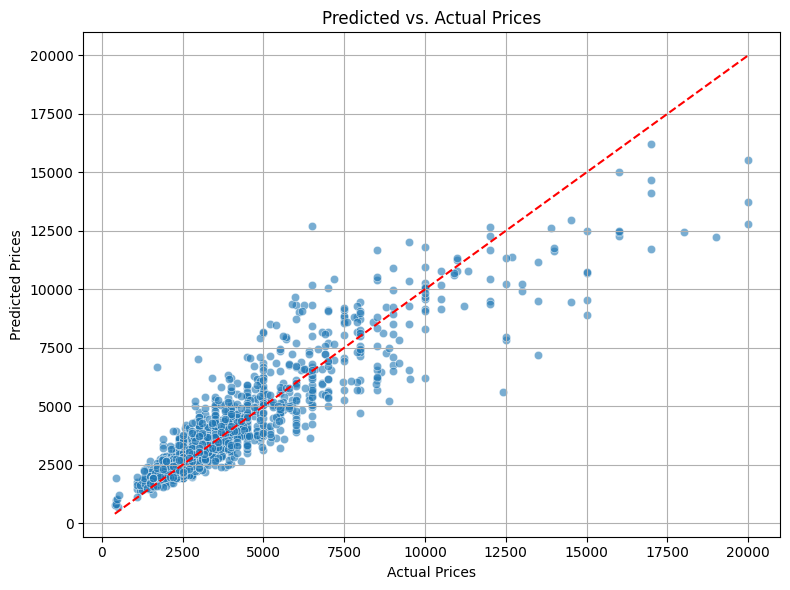

In [33]:
# Scatter plot: actual vs predicted
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=final_predictions, alpha=0.6)

# Plot a diagonal line for perfect prediction
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')

plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Predicted vs. Actual Prices")
plt.grid(True)
plt.tight_layout()
plt.show()